# Laboratório 2: Criando uma rede neural simples com o keras

Bem vindo ao laboratório 2 do Mini curso de TensorFlow, neste tutorial vamos aprender a classificar imagens de roupas como tênis e camisetas utilizando o TensorFlow 2 e o keras.

<img src="imgs/tf_logo_social.png" width="500">

O Keras (tf.keras) é uma API de alto nível para o TensorFlow que nos pertmite construir e treinar modelos de deep learning de uma forma rápida e simplificada. Além de poupar a escrita de muitas linhas de código, o tf.keras possui algumas vantagens que tornam essa API indicada para quem está começando e não deseja se aprofundar na parte matemática de início:

* Interface otimizada e de uso simplificado para casos simples.
* Permite prototipagem fácil e rápida.
* Suporta redes convolucionais e redes recorrentes, bem como combinações das duas.
* Funciona perfeitamente na CPU e GPU.

O objetivo deste laboratório será a construção de uma rede neural que permita classificar imagens de roupas como tênis e camisetas de forma simplificada e com poucas linhas de código, no final será possível visualizar a classificação efetuada pela rede e compará-la com a classificação real de cada ítem. Utilizaremos como base de dados a Fashion MNIST que contém cerca de 70,000 imagens em tons de cinza em 10 categorias, cada imagem mostra artigos individuais de roupas com baixa resolução (28 por 28 pixels), como podemos observar abaixo:

<img src="imgs/fashion-mnist-sprite.png" width="500">

A Fashion MNIST tem como intenção substituir a clássica base de dados MNIST que era frequentemente utilizada como "Hello, World" em programas de aprendizado de máquina (machine learning) voltados para visão computacional. 

##  Importando as bibliotecas necessárias para o projeto

Para realizarmos a construção da nossa rede neural com o Keras, precisamos importar algumas bibliotecas essenciais para a construção da nossa rede e algumas outras bibliotecas que nos  ajudarão a ter uma melhor visualização e manipulação dos dados. O código abaixo realiza as importações necessárias, não se preocupe pois as respectivas bibliotecas já se encontram devidamente instaladas:

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt

# Verificamos se a importação foi realizada
print(tf.__version__) 

1.14.0


Caso tenha sido impresso a versão do Tensorflow instalada, a importação foi feita com sucesso e o próximo passo será conhecer melhor o nosso dataset.

## Conhecendo o dataset

Primeiro vamos importar e carregar a base Fashion MNIST diretamente do TensorFlow, para isso vamos instanciar uma variável conhecida como "fashion_mnist" que irá conter um objeto que vai nos permitir carregar a base de dados para podermos manipulá-la. Em seguida vamos utilizar o método .load_data() para poder carregar os dados e separá-los em dois grupos: um grupo com 10.000 imagens para teste e um outro grupo com 60.000 imagens para treinamento:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(imagens_treinamento, imagens_treinamento_labels), (imagens_teste, imagens_teste_labels) = fashion_mnist.load_data()

Com o Keras a manipulação de dados se torna mais simplificada, no código acima conseguimos carregar de uma base de dados pronta cerca de mais de 60.000 imagens e separá-las em grupos de teste e treinamento, além dos seus respectivos labels, sem nenhuma dificuldade. Vamos brincar um pouco com a nossa base de dados e visualizar algum elemento da mesma escolhendo aleatoriamente um número entre 0 59.999, no exemplo abaixo vamos visualizar o segundo ítem da nossa base de treinamento:

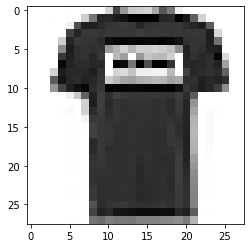

In [3]:
plt.imshow(imagens_treinamento[1],cmap=plt.cm.binary,)
plt.show()

O que temos basicamente armazenado em cada variável é uma lista contendo as imagens de cada roupa, note que caso façamos a impressão dos dados brutos de um ítem presente em nossa base para treinamento ou teste será possível observar que na verdade o que temos será a impressão de cada pixel da imagem na escala de cinza:

In [4]:
print(imagens_treinamento[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

As imagens caregadas são arrays NumPy de tamanho 28x28, com os valores des pixels entre 0 to 255. Já os labels (alvo da classificação) são um array de inteiros, no intervalo de 0 a 9 e correspondentes a suas respectivas imagens. 

Em seguida, precisamos definir os nomes de cada classe a ser reconhecida pela nossa rede neural, temos um total de 10 classes com suas representações numéricas variando de 0 a 9.
<img src="imgs/nomes-classes.png" width="800">

Esses nomes já foram pré-definidos inicialmente, o que acontece é que o nome das classes não são incluídas na base de dados e precisamos adicionálas manualmente:



In [5]:
nomes_das_classes = ['Camiseta/Top', 'Calça', 'Suéter', 'Vestido', 'Casaco','Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Botas']

Os valores de pixels variam entre 0 e 255, no entanto são numeros consideravelmente altos e precisamos ajustar esses valores para uma margem menor como entre 0 e 1 para que o nosso treinamento possa ser efetuado sem prejudicarmos o desempenho de nossa rede. Escalaremos esses valores, tanto da base de treinamento quanto da base de teste, no intervalo de 0 e 1 antes antes de alimentar o modelo da rede neural, para isso, vamos dividimos os valores por 255 e assim teremos valores entre o intervalo esperado.

In [6]:
imagens_treinamento = imagens_treinamento / 255.0
imagens_teste = imagens_teste / 255.0

Para verificarmos que os dados estão no formato correto e não foram afetados com a mudança de intervalo, vamos visualizar as primeiras 25 imagens da nossa base de treinamento e o respectivo nome das classes de cada imagem abaixo:

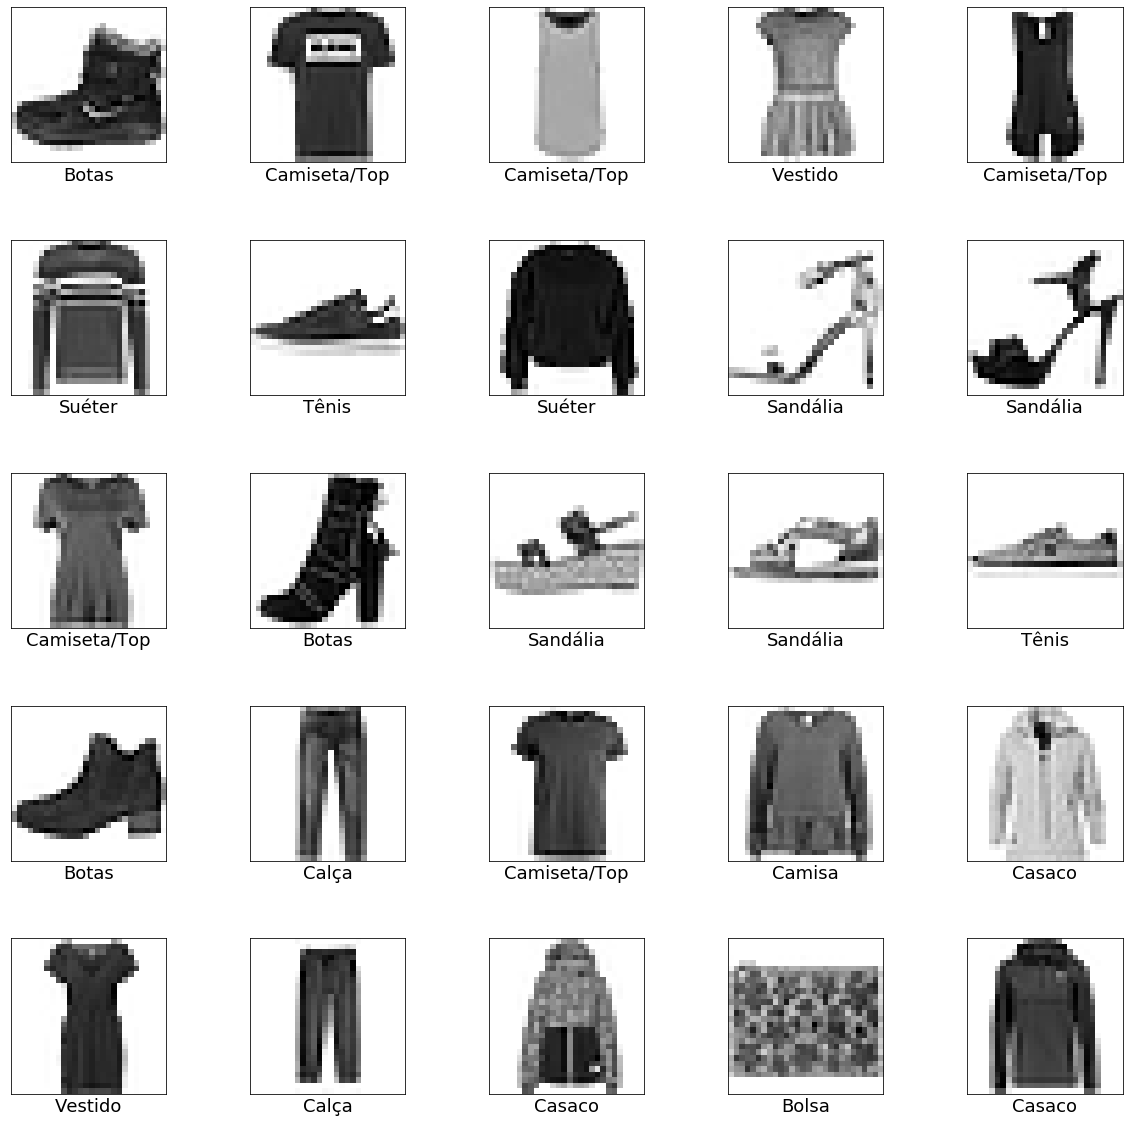

In [7]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 18})
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(imagens_treinamento[i], cmap=plt.cm.binary)
    plt.xlabel(nomes_das_classes[imagens_treinamento_labels[i]])
plt.show()

O passo seguinte será definir a arquitetura da nossa rede neural para que possamos trabalhar com a base de dados e obter um melhor resultado possível.

## Definindo a arquitetura da rede

Antes mesmo de começarmos a construir a nossa rede neural, precisamos primeiramente definir a sua arquitetura que irá variar conforma a precisão que se busca e a característica do estudo de caso em que estamos trabalhando. Para fins educacionais este tutorial irá focar apenas em construir uma rede neural simples capaz de garantir uma precisão na casa dos 80% a 90%, no entanto com algumas otimizações e aperfeiçoamentos da rede podemos chegar a passar dos 90% de precisão porém para isso precisa-se de tempo para construção da rede e seu treinamento. Nossa rede neural então irá possuir 3 camadas: 

* Uma de entrada onde realizaremos um tratamento dos dados para garantir maior velocidade e precisão;
* Uma camada oculta onde o aprendizado de fato irá ocorrer;
* Uma camada de saída que irá nos mostrar como saída o quanto uma imagem pertence a determinada classe.

Iniciamos com a definição da estrutura da camada de entrada da nossa rede, como os dados são basicamente um array com duas dimensões será necessário converter cada imagem para um array de uma dimensão apenas. Esta conversão é necessária para simplificar a manipulação dos dados e permitir uma melhora no aprendizado da nossa rede através de uma técnica conhecida como "achatamento" de dados (ou Flatten data), basicamente o que iremos fazer será converter as imagens de duas dimensões (28 por 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels) sem alterar os dados. Esta camada não possui paramêtros para aprender, ela apenas reformata os dados. A baixo temos uma ilustração de como fica a estrutura da nossa primeira camada: 

<img src="imgs/camada1.png" width="200">

Observe na imagem que cada circulo corresponde a um neurônio e respectivamente a entrada de um pixel existente na imagem. Basicamente cada imagem é transformada em um array unidimensional nessa camada e cada neurônio fica responsável pela informação contida em um pixel totalizando 784 neurônios na primeira camada, onde cada neurônio dessa camada deverá em seguida repassar as informações para a camada seguinte. 

A camada seguinte será a responsável pelo aprendizado da nossa rede, esta camada é muito importante e deve ser construída com cautela pois pode prejudicar a precisão ou até mesmo elevar o tempo de treinamento desnecessariamente. Construir uma boa rede neural envolve muito da experiência de quem está trabalhando, por tanto é quase impossível afirmar que existe apenas um tipo de solução para um dado problema pois esta é uma etapa empírica onde a experiência e conhecimento técnico determinam a qualidade da sua rede. 

Vamos definir um valor de 128 neurônios para esta camada, um valor consideravel e capaz de trazer um bom resultado sem elevar muito o tempo de treinamento. Por ser uma camada em que será responsável pelo aprendizado, onde internamente cada neurônio irá possuir seus pesos e bias, será necessário definir uma função de ativação para esta camada  que vai permitir saber se a informação que o neurônio está recebendo é relevante para a informação fornecida ou deve ser ignorada. Existe inúmeras funções de ativação e cada uma possui uma característica que a torna mais adequada para determinada situação:

<img src="imgs/funcoesativacao.png" width="800">

A função de ativação escolhida para esta camada será a ReLU (linear rectificadora) que é uma função amplamente utilizada ao projetar redes neurais atualmente e capaz de trabalhar com problemas não lineares. Voltando a topologia da nossa rede neural, a camada oculta possuirá a seguinte estrutura:

<img src="imgs/camada2.png" width="200">

Em seguida precisamos definir a topologia da nossa ultima camada, camada de saída, nela é interessante termos como resultado a porcentagem de quanto uma imagem pertence a uma determinada classe, e para isso precisaremos utilizar uma função de ativação conhecida como softmax. A função de ativação softmax é um tipo de função sigmóide muito utilizada em problemas de classificação com multiplas classes de forma a termos como resultado um valor em porcentagem do grau de pertencimento de uma imagem a uma determinada classe. A topologia da ultima camada da nossa rede irá possuir 10 neurônios correspondentes a cada uma das classes pertencentes ao nosso estudo de caso, conforme podemos notar a seguir:

<img src="imgs/camada3.png" width="200">

Outro fato importante a se destacar é que  a nossa rede neural será completamente conectada, o que significa que todos os neurônios de uma camada se conectam a todos os neurônios da camada seguinte. Por tanto a topologia final da rede será a seguinte:

<img src="imgs/topologia.png" width="800">


O passo seguinte será a construção do nosso modelo da rede neural que acabamos de definir, nesta etapa iremos configurar as camadas do modelo e logo em seguida compilar o modelo para podermos prosseguir com o treinamento da rede.

## Construindo o modelo da nossa rede neural

Uma vez definido a arquitetura da nossa rede, precisamos agora construir o modelo no TensorFlow que irá representar a arquitetura definida. Para isso utilizaremos o método *keras.Sequential()* onde iremos passar como parâmetro uma lista que irá conter cada camada da nossa rede. 

In [8]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

W1022 16:15:31.888238 140311511045952 deprecation.py:506] From /home/ronald/anaconda3/envs/minicurso/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Observe que cada camada foi definida no modelo seguindo a arquitetura proposta:
* **Camada de entrada** - A primeira camada foi justamente a camada com o "achatamento" (tf.keras.layers.Flatten) que definimos, esta camada será responsável por formatar os dados e como parâmetros passamos a resolução das imagens que no nosso caso foi de 28x28 pixels. 
* **Camada oculta** - A segunda camada foi definida pelo metodo *keras.layers.Dense()*, recebendo como parâmetros iniciais o número de neurônios desejados para esta camada e o tipo de função de ativação que esta camada deve trabalhar que no nosso caso foi a ReLU. Note que será nesta camada que o aprendizado irá ocorrer de fato.
* **Camada de saída** - A ultima camada foi definida pelo método *keras.layers.Dense()*, recebendo como parâmetros o número de neurônios que em nosso caso será correspondente ao número de classes e o tipo de função de ativação que desejamos que esta camada tenha. Onde cada nó contem um valor que indica a probabilidade de que aquela imagem pertencer a uma das 10 classes.

Alguns parâmetros extras devem ser configurados para que o nosso modelo possa prosseguir para a etapa de treinamento pois envolvem aspectos como medição de precisão de treinamento e atualização dos pesos e bias, esses parâmetros são inseridos no passo de compilação:

* **Optimizer** - Este parâmetro define como o modelo deve se atualizar com base no dado que ele vê e sua função loss;
* **Loss** - Este parâmetro mede o quão preciso o modelo é durante o treinamento;
* **Metrics** - Este parâmetro serve para monitorar os passos de treinamento e teste, onde no nosso caso irá monitorar a precisão que o treinamento da nossa rede está obtendo.

O código abaixo corresponde a compilação do modelo e a definição destes parâmetros complementares:

In [9]:
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## Treinando a rede

Para o treinamento da nossa rede, vamos utilizar o método *.fit()* que nada mais é do que um método do TensorFlow responsável pelo treinamento dos modelos de redes neurais para um número específico de épocas. Uma época nada mais é do que a apresentação de todos os elementos do conjunto de treinamento no processo de aprendizado, ou seja, basicamente representará o número de vezes que determinado dado irá passar pela nossa rede durante o treinamento. Ao chamarmos este método, além do número de épocas, precisamos repassar as imagens de treinamento e seus respectivos labels conforme observa-se abaixo:

In [10]:
modelo.fit(imagens_treinamento, imagens_treinamento_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.5007 - acc: 0.8235
Epoch 2/10
60000/60000 [==============================] - 7s 108us/sample - loss: 0.3748 - acc: 0.8654
Epoch 3/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3369 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3122 - acc: 0.8842
Epoch 5/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2940 - acc: 0.8918
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2805 - acc: 0.8957
Epoch 7/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2674 - acc: 0.9007
Epoch 8/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2585 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2474 - acc: 0.9072
Epoch 10/10
60000/60000 [==============================] - 7s 119us/sampl

Conforme o modelo treina, valores de perda (loss) e precisão (acurácia) são exibidos, em nosso exemplo obtivemos uma média de 88% de precisão em nosso treinamento. Ter mais de uma época de treinamento é essencial para a precisão da nossa rede, uma vez que os dados são sequenciados aleatóriamente para o treinamento, uma unica sequência de imagens pode afetar a precisão da nossa rede durante o processo de aprendizado. Em nosso exemplo definimos apenas 10 épocas para o treinamento, este valor é arbitrário e impacta diretamente no tempo de treinamento da sua rede e consequêntemente na precisão da mesma.

## Avaliando a precisão da rede

Para avaliarmos a precisão da rede neural que construimos e treinamos, vamos utilizar o conjunto de treinamento como entrada do metodo *evaluate()* :

In [11]:
valor_perda, valor_precisao = modelo.evaluate(imagens_teste, imagens_teste_labels)
print('\nPrecisão na classificação das amostras de teste:', valor_precisao) 

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3354 - acc: 0.8843

Precisão na classificação das amostras de teste: 0.8843


Observe que a precisão obtida ao utilizar o conjunto de teste é um pouco menor do que a precisão exibida na etapa de treinamento. Essa diferença representa um *overfitting*. O *overfitting* ocorre quando o modelo de aprendizado de máquina funciona bem para os dados existentes, mas não tem um bom resultado para novas situações. Vamos confirmar a precisão da nossa rede para o conjunto das amostras de treinamento e assim visualizar melhor a diferença:

In [12]:
valor_perda_treinamento, valor_precisao_treinamento = modelo.evaluate(imagens_treinamento, imagens_treinamento_labels)
print('\nPrecisão na classificação das amostras de treinamento:', valor_precisao_treinamento) 

60000/60000 [==============================] - 4s 59us/sample - loss: 0.2203 - acc: 0.9175

Precisão na classificação das amostras de treinamento: 0.9174833


Como podemos observar, para o conjunto de treinamento a precisão foi de 90% enquanto a precisão para o conjunto de teste foi de 87% que é a precisão real da rede que desenvolvemos, o que nos mostra a importância de se utilizar para teste sempre um conjunto de dados que esteja fora do conjunto de treinamento para evitar situações como *overfitting* e assim garantir que os resultados do processo de treinamento e construção da rede não sejam afetados. 

## Realizando classificações

Com a nossa rede neural já treinada, podemos prosseguir para a etapa de classificação de imagens. Nesta etapa utilizaremos o método *predict()* para solicitarmos a classificação dos dados para a nossa rede, este método recebe como parâmetro o dado que queremos classificar e nos retorna um vetor com as probabilidades daquele dado pertencer a uma determinada classe. A seguir podemos visualizar um exemplo de classificação coma as imagens pertencentes ao conjunto de teste:

In [13]:
classificacao = modelo.predict(imagens_teste)

print(classificacao[0])

[4.4207762e-05 2.9903482e-09 3.9918145e-06 7.1890144e-10 8.3785608e-06
 1.9118773e-04 3.5854675e-06 7.5639337e-03 6.5816624e-07 9.9218410e-01]


O código acima realizou a classificação de todo o nosso conjunto de teste, no entanto nos foi impresso a classificação da praimeira imagem para podermos visualizar o tipo de resposta que é obtido para cada dado. Observe que para cada imagem é retornado um vetor contendo a probabilidade daquela imagem pertencer a uma determinada class. Para visualizar a classe com a maior probabilidade utilizaremos o método *np.argmax()* que retorno a posição que possui o maior valor dentro desse vetor de probabilidades.

In [14]:
print("Posição com maior probabilidade: " +str(np.argmax(classificacao[0])))

print("\nA imagem foi classificada como: "+ str(nomes_das_classes[np.argmax(classificacao[0])]))

Posição com maior probabilidade: 9

A imagem foi classificada como: Botas


A classificação foi realizada com sucesso, nossa rede neural já é capaz de classificar as amostras de teste em uma das 10 classes de roupas disponíveis. Para visualizarmos melhor a classificação utilizaremos o código abaixo que nos permite visualizar as 12 primeiras imagens do conjunto de teste, bem como a classificação feita pela rede e qual a real classe que a respectiva imagem pertence:

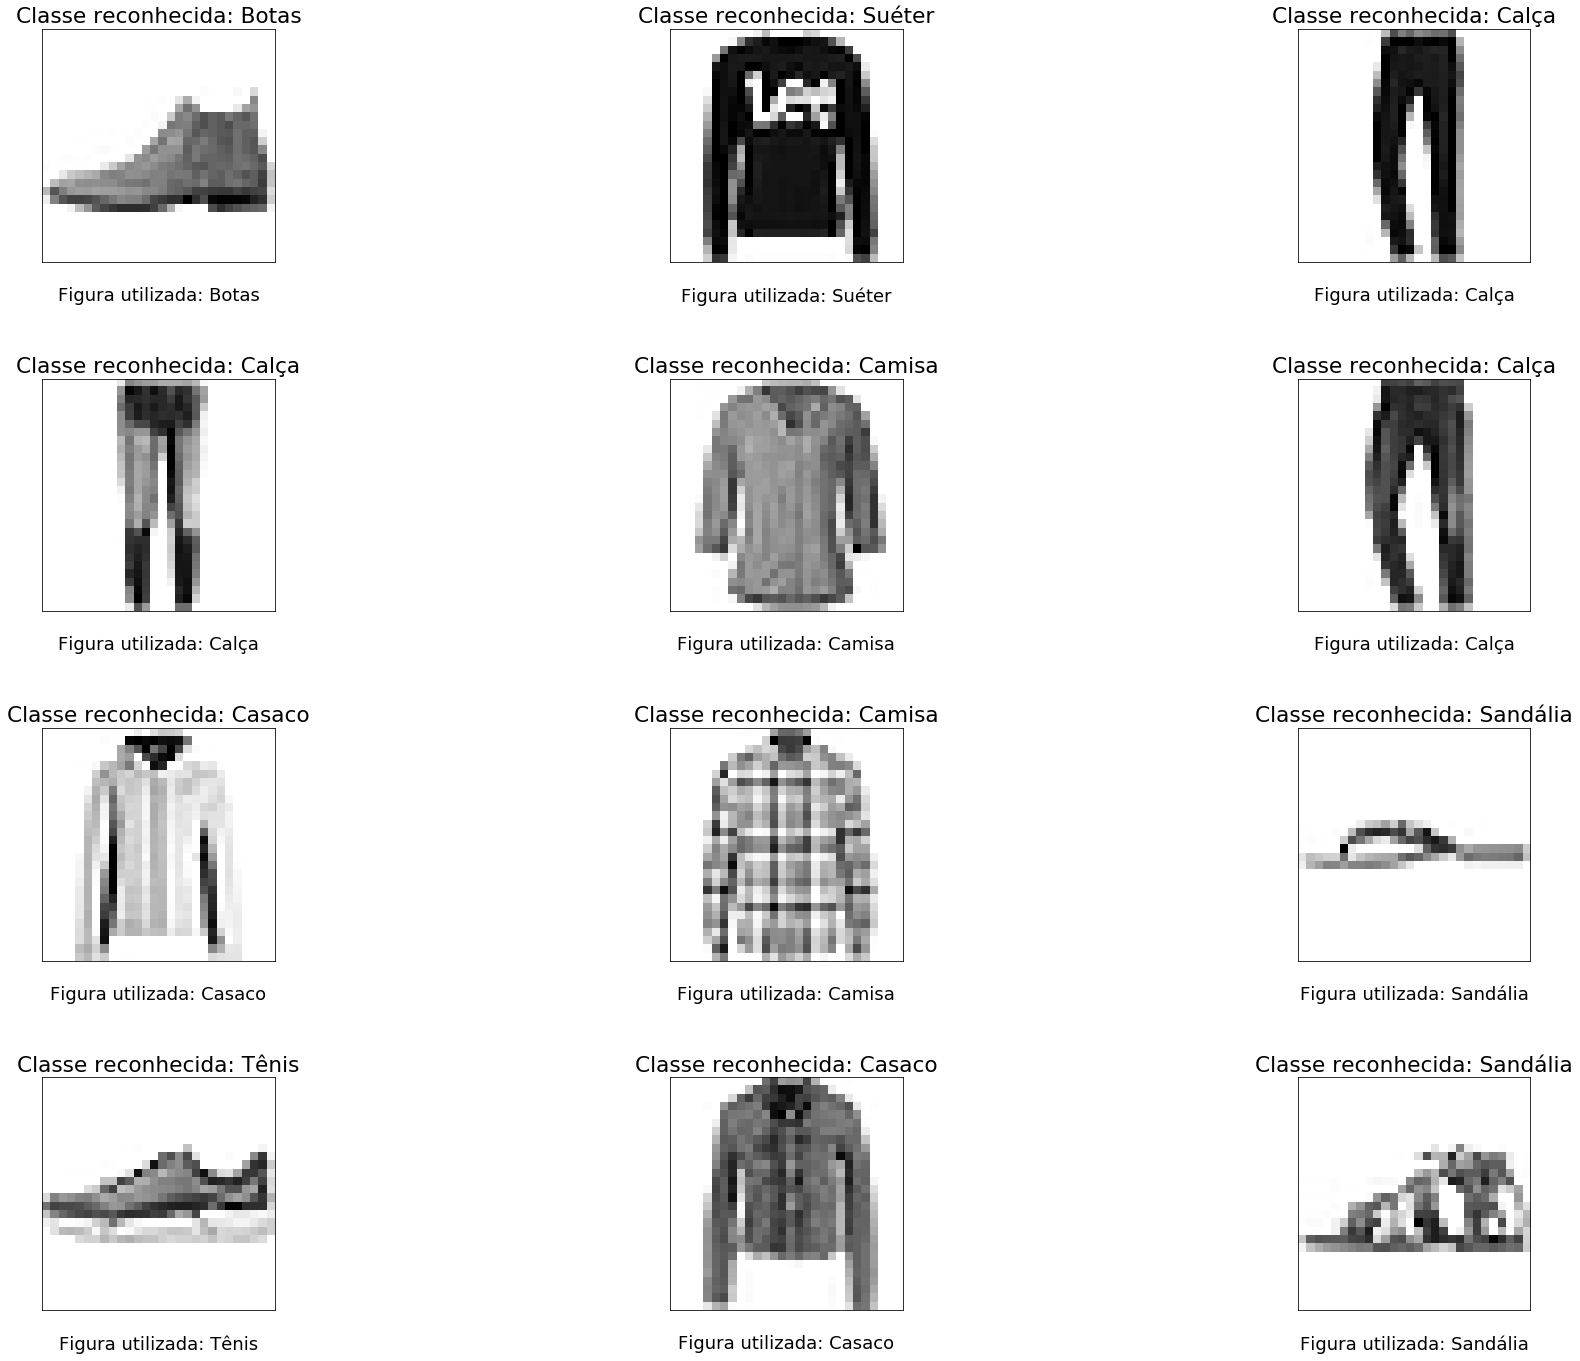

In [17]:
plt.figure(figsize=(30,30))
for i in range(12):
    plt.subplot(5,3,i+1)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagens_teste[i], cmap=plt.cm.binary)
    plt.xlabel("\nFigura utilizada: "+ nomes_das_classes[imagens_teste_labels[i]])
    plt.title("Classe reconhecida: "+ nomes_das_classes[np.argmax(classificacao[i])])
plt.show()

E pronto, chegamos ao fim de mais um laboratório do minicurso, espero que tenha gostado dessa atividade prática e até a próxima!